# Classifiers Applied to Car Evaluations Dataset

Car Evaluation Dataset: https://archive.ics.uci.edu/dataset/19/car+evaluation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
data = pd.read_csv('car.data', header=None, names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])

In [3]:
# Encode categorical variables
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [4]:
# Convert multi-class to binary class 
data['class'] = (data['class'] != 0).astype(int)

In [5]:
# Split the dataset into features (X) and the target variable (y)
X = data.drop('class', axis=1)
y = data['class']

In [6]:
# Define the classifiers and their parameter grids
classifiers = {
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [5, 10, None]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]})
}

In [7]:
# Define the train-test splits
splits = [0.2, 0.5, 0.8]

In [8]:
# List to store the results
results = []
heatmaps = {}

In [9]:
# Iterate over each classifier, each split, and perform GridSearchCV
for name, (clf, param_grid) in classifiers.items():
    for test_size in splits:
        # Multiple trials
        for trial in range(3):
            # Split the data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=trial)
            
            # Standardize features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Hyperparameter tuning
            grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
            grid_search.fit(X_train_scaled, y_train)

            # Store heatmap data
            if name not in heatmaps:
                heatmaps[name] = []
            heatmaps[name].append({
                'params': grid_search.cv_results_['params'],
                'mean_test_score': grid_search.cv_results_['mean_test_score'],
                'split': test_size
            })

            # Best model, training accuracy, and test accuracy
            best_model = grid_search.best_estimator_
            train_accuracy = accuracy_score(y_train, best_model.predict(X_train_scaled))
            test_accuracy = accuracy_score(y_test, best_model.predict(X_test_scaled))

            # Store results
            results.append((name, test_size, grid_search.best_params_, train_accuracy, test_accuracy))

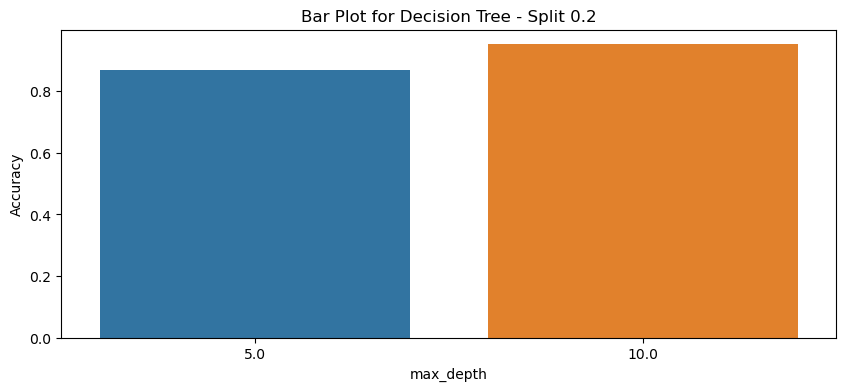

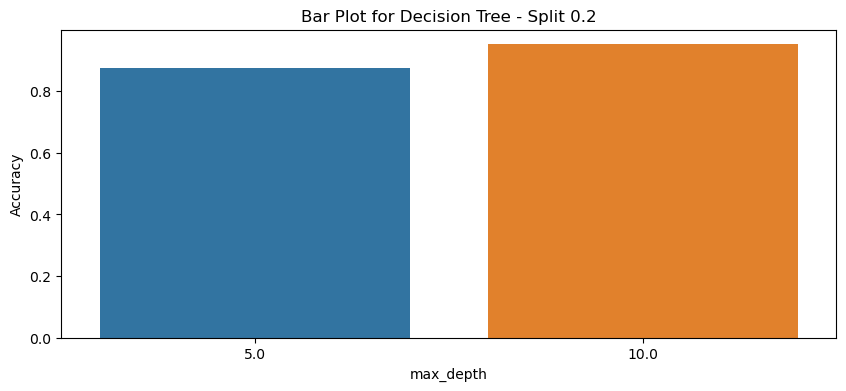

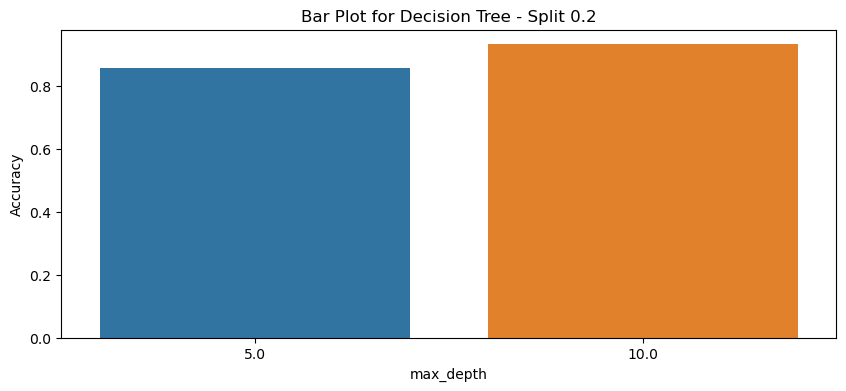

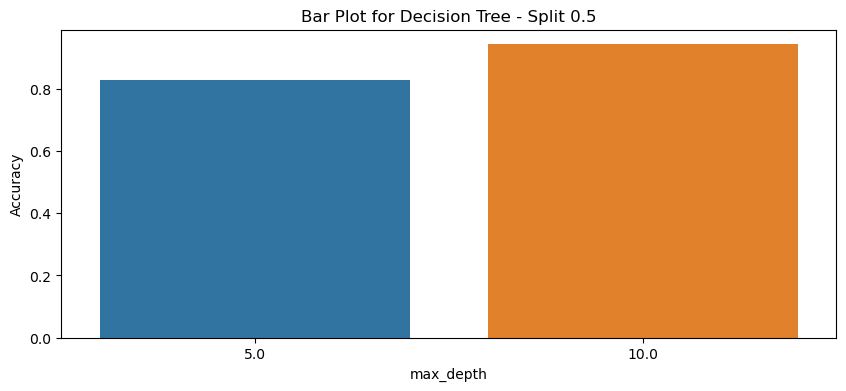

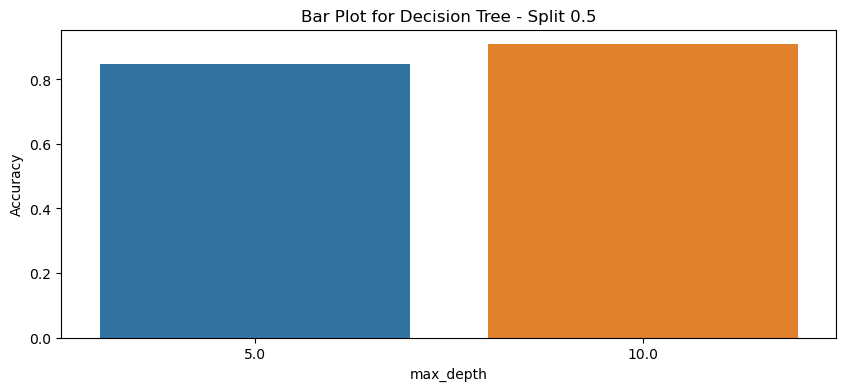

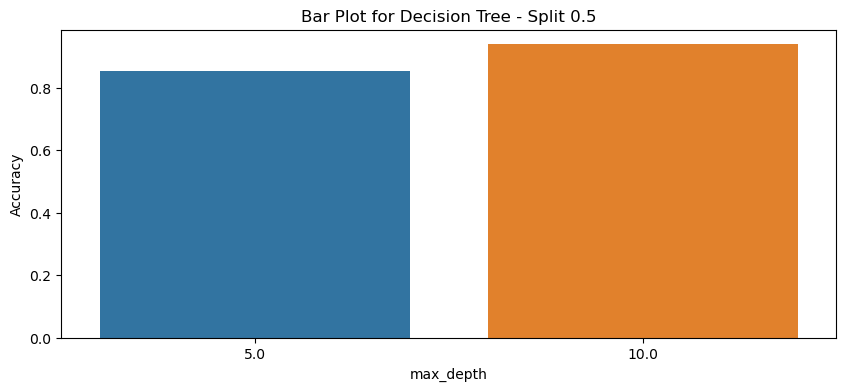

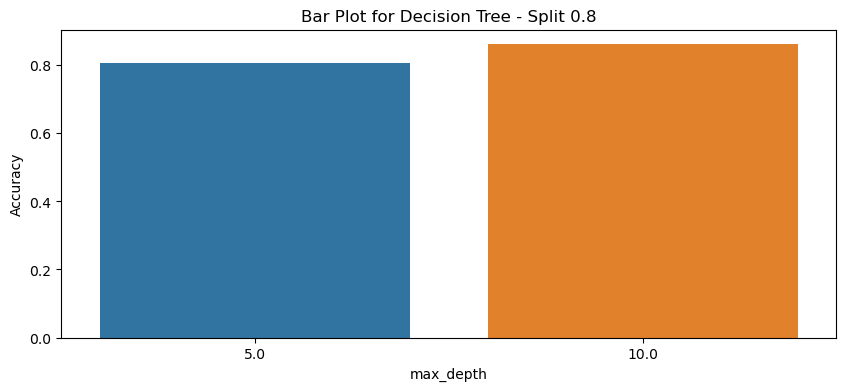

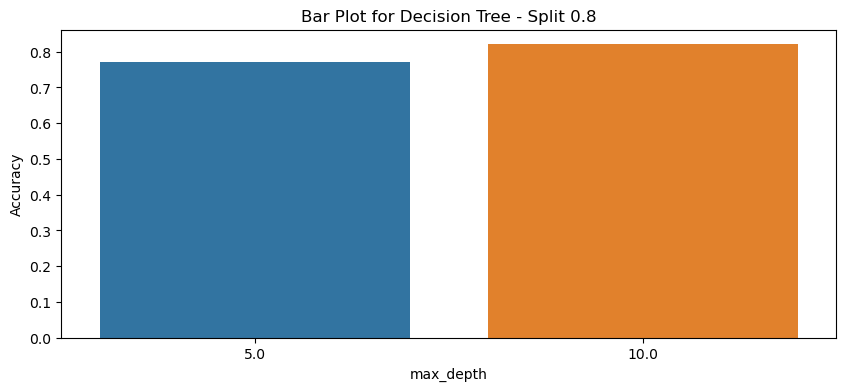

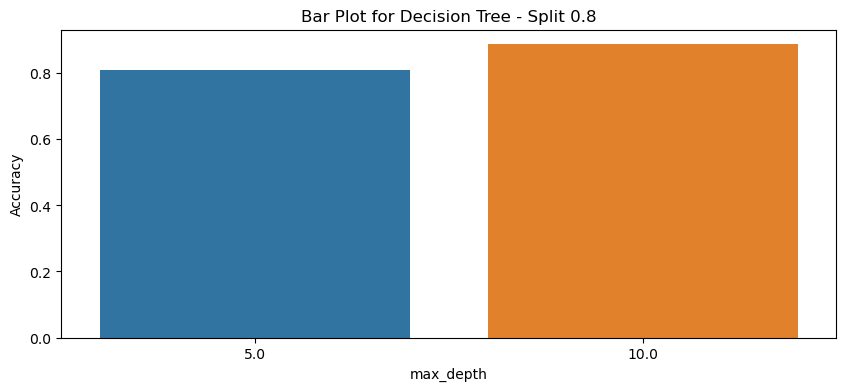

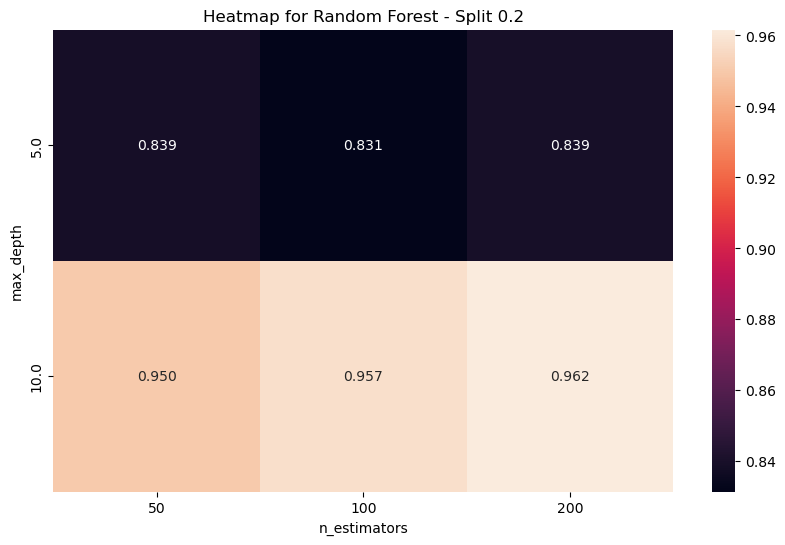

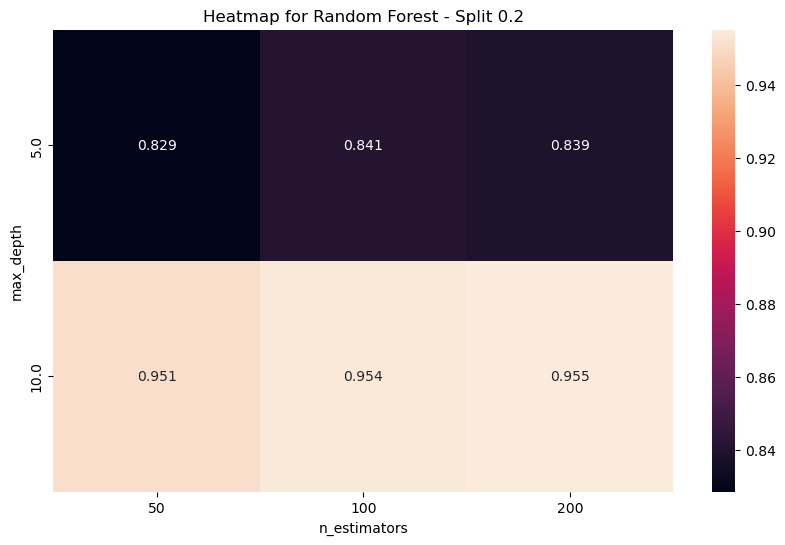

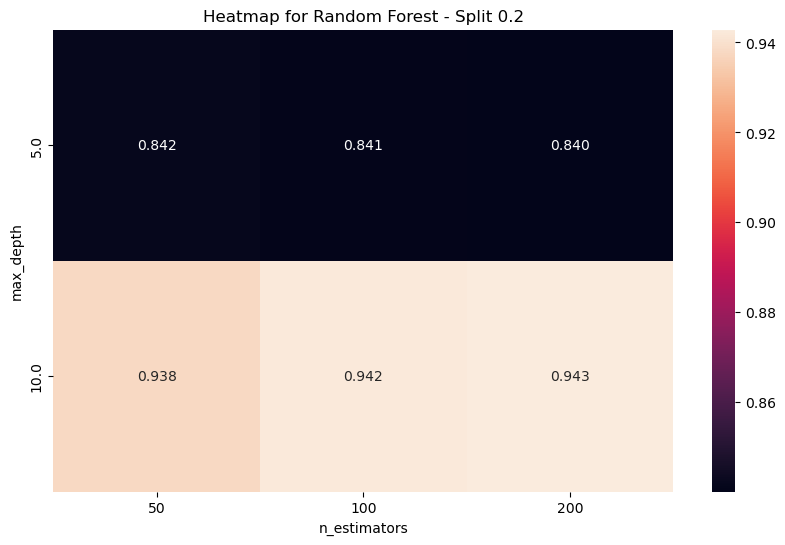

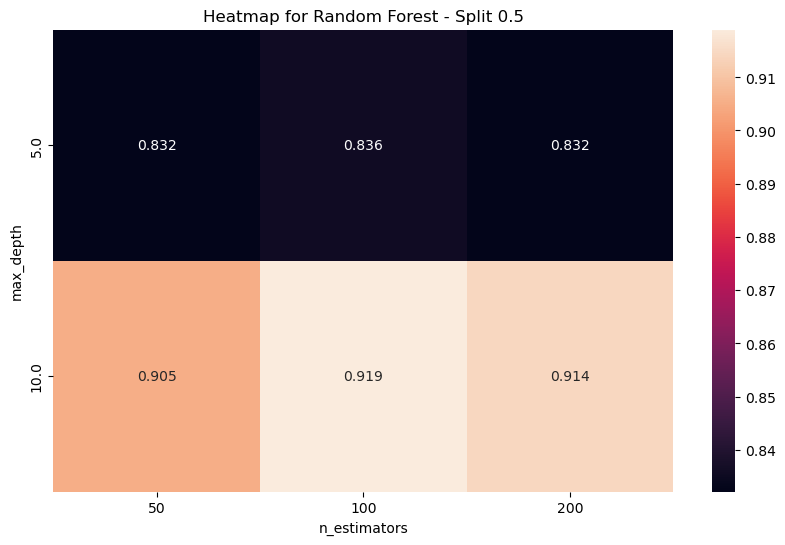

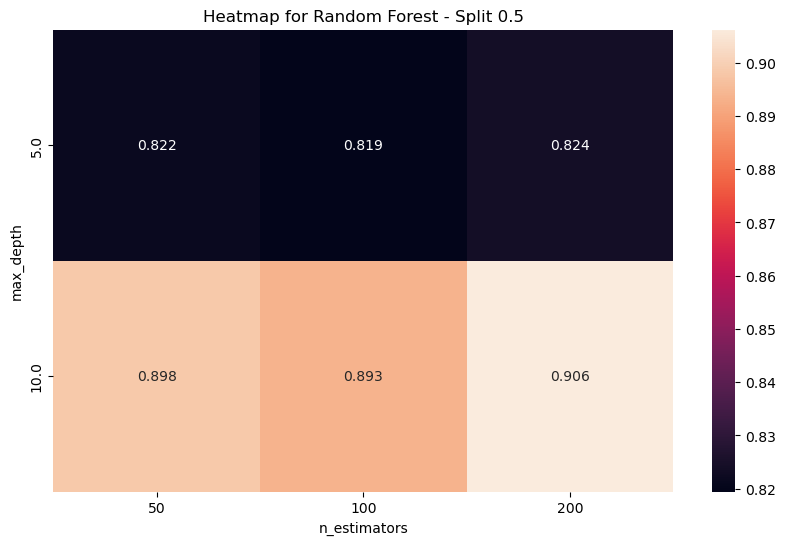

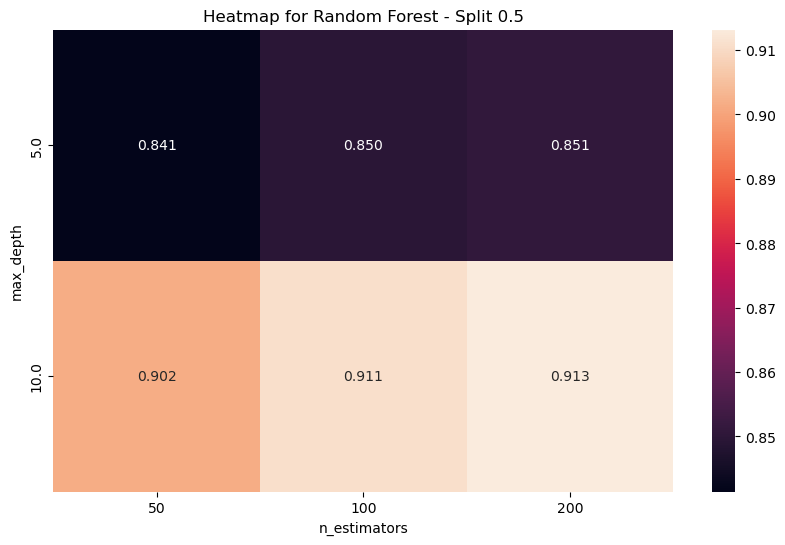

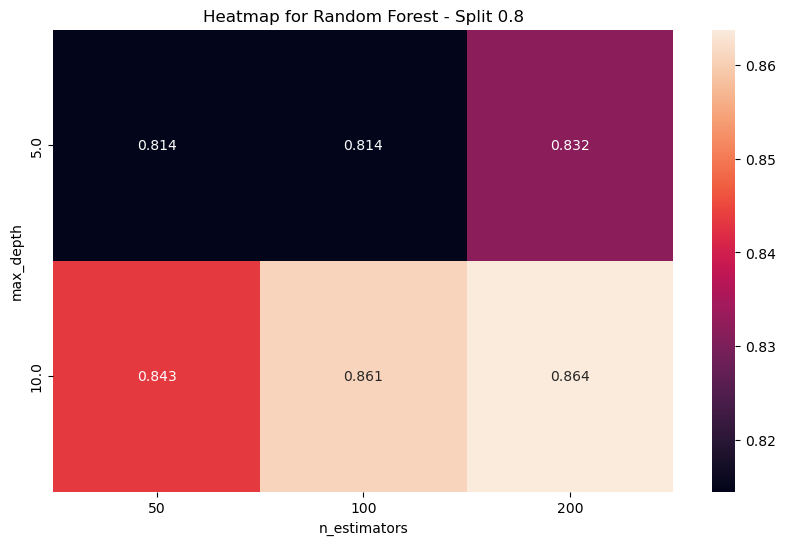

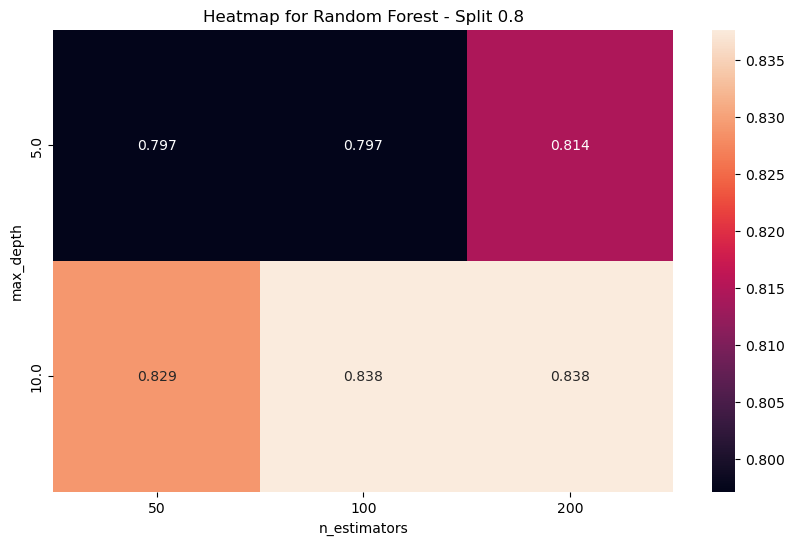

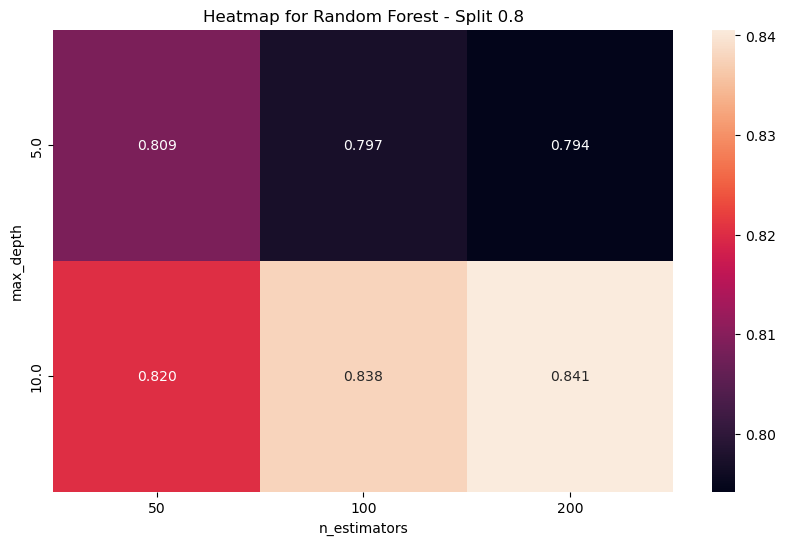

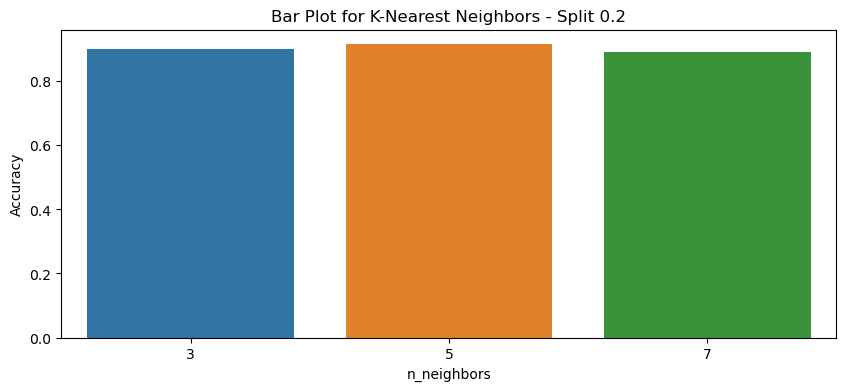

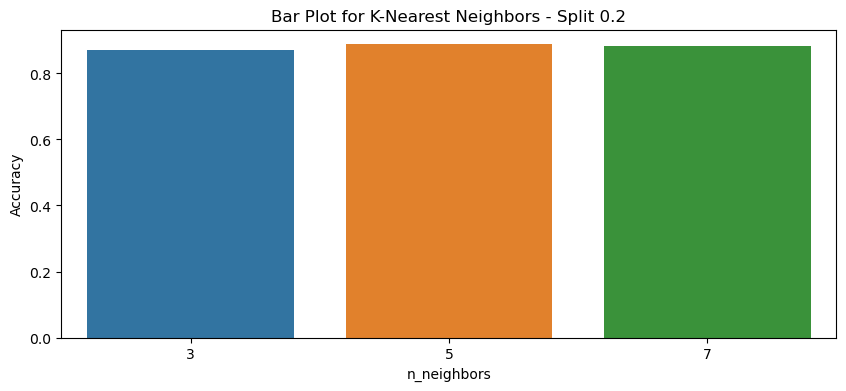

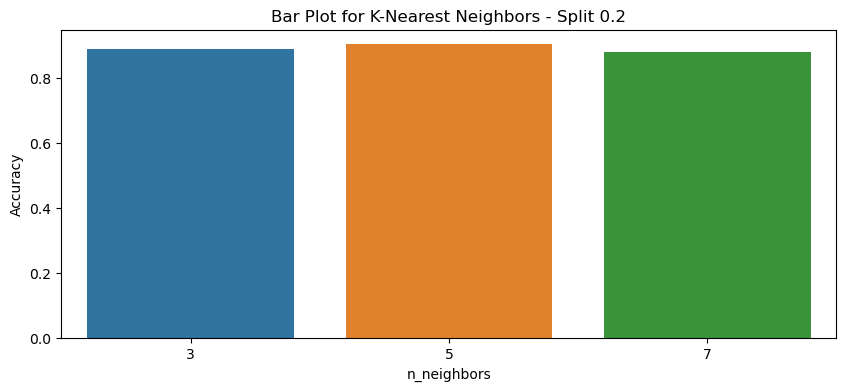

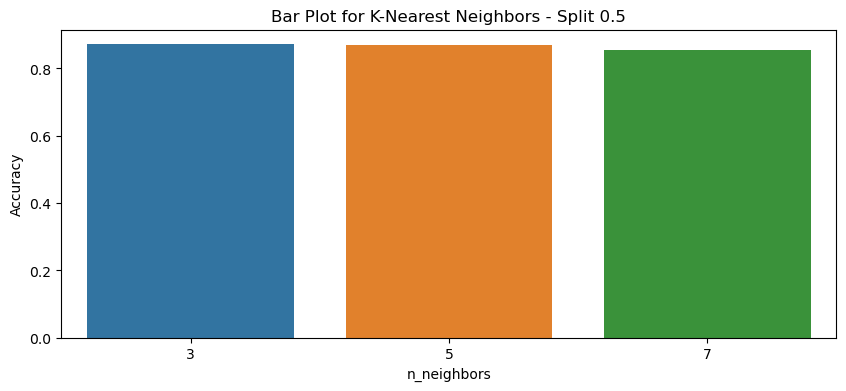

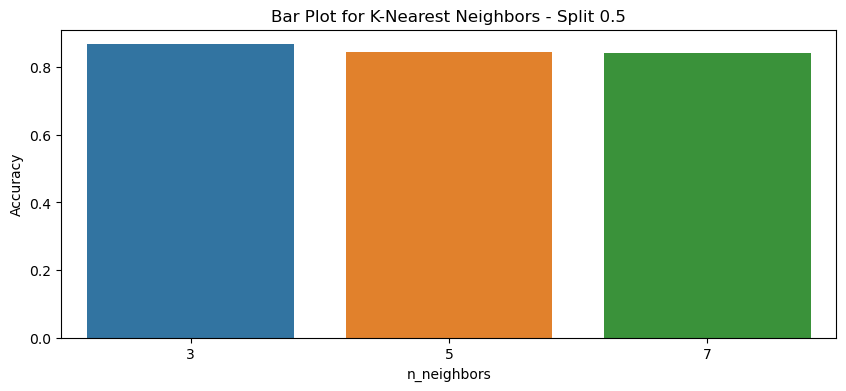

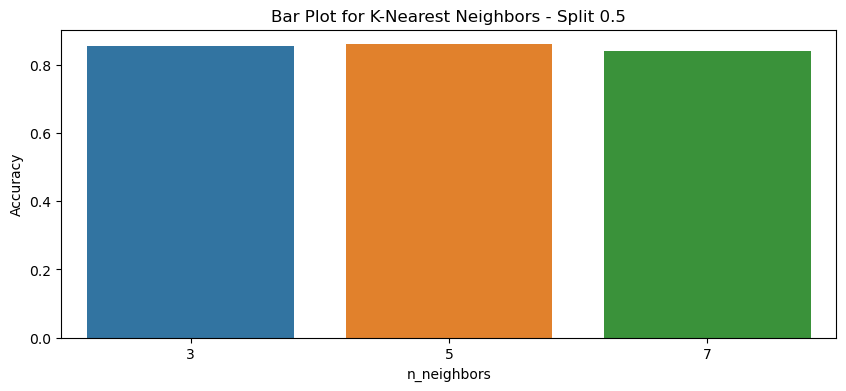

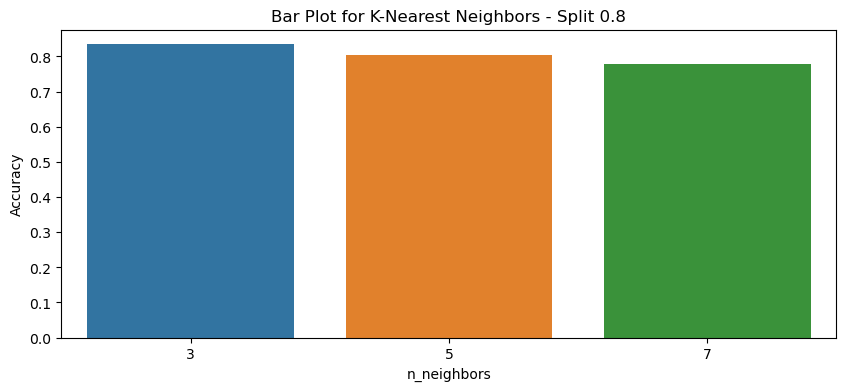

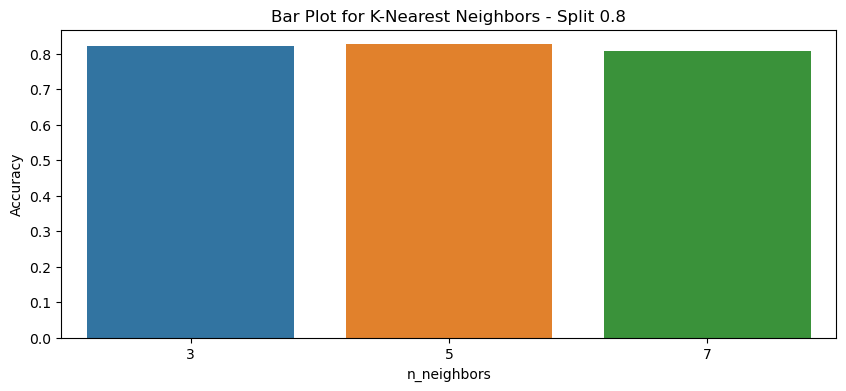

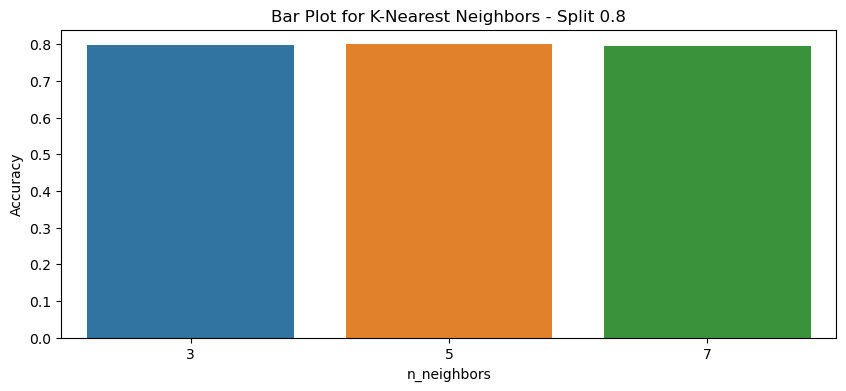

In [10]:
# Plotting heatmaps
for classifier, heatmap_data in heatmaps.items():
    for data in heatmap_data:
        df = pd.DataFrame(data['params'])
        df['Accuracy'] = data['mean_test_score']
        df['Split'] = data['split']

        # Determine the hyperparameters used
        hyperparameters = df.columns[:-2]  # Exclude 'Accuracy' and 'Split'

        if len(hyperparameters) == 2:
            plt.figure(figsize=(10, 6))
            sns.heatmap(df.pivot_table(index=hyperparameters[0], columns=hyperparameters[1], values='Accuracy'), annot=True, fmt=".3f")
            plt.title(f'Heatmap for {classifier} - Split {data["split"]}')
            plt.show()
        elif len(hyperparameters) == 1:
            plt.figure(figsize=(10, 4))
            sns.barplot(x=hyperparameters[0], y='Accuracy', data=df)
            plt.title(f'Bar Plot for {classifier} - Split {data["split"]}')
            plt.show()
        else:
            print(f"Not able to plot heatmap for {classifier} with hyperparameters: {hyperparameters}")


In [11]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Classifier', 'Test Size', 'Best Params', 'Train Accuracy', 'Test Accuracy'])

In [12]:
# Aggregate and report results
average_results = results_df.groupby(['Classifier', 'Test Size']).mean(numeric_only=True).reset_index()

In [13]:
# Display the results
print(average_results)

            Classifier  Test Size  Train Accuracy  Test Accuracy
0        Decision Tree        0.2        1.000000       0.956647
1        Decision Tree        0.5        1.000000       0.945216
2        Decision Tree        0.8        0.988406       0.866956
3  K-Nearest Neighbors        0.2        0.973227       0.928709
4  K-Nearest Neighbors        0.5        0.949074       0.882716
5  K-Nearest Neighbors        0.8        0.891787       0.827187
6        Random Forest        0.2        0.999759       0.965318
7        Random Forest        0.5        1.000000       0.937886
8        Random Forest        0.8        1.000000       0.876597
